Nama : Najla Dhia Rusydi

NIM : 164221043

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi
import matplotlib.pyplot as plt


# **Import Data**

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

# data yang akan digunakan untuk Informaton Retrival
df_obat = pd.read_csv('data_halodoc.csv')
df_pertanyan = pd.read_csv('dataset pertanyaan.csv')

# data ground truth
df1 = pd.read_csv('pertanyaan 1.csv')
df2 = pd.read_csv('pertanyaan 2.csv')
df3 = pd.read_csv('pertanyaan 3.csv')
df4 = pd.read_csv('pertanyaan 4.csv')
df5 = pd.read_csv('pertanyaan 5.csv')
df6 = pd.read_csv('pertanyaan 6.csv')

df_obat

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,name,price,Aturan Pakai,Dosis,Efek Samping,Golongan Produk,Indikasi Umum,Kemasan,Komposisi,Kontra Indikasi,Manufaktur,No. Registrasi,Perhatian,uses
0,Sildenafil Citrate 50 mg 4 Tablet,Rp96.500 - Rp168.500,Dikonsumsi satu jam sebelum melakukan aktivita...,PENGGUNAAN OBAT INI HARUS SESUAI DENGAN PETUNJ...,"Sakit kepala, rasa panas dan kemerahan pada ku...",Obat Keras (Merah),INFORMASI OBAT INI HANYA UNTUK KALANGAN MEDIS....,"Dus, 1 Strip @ 4 Tablet",Sildenafil citrate 50 mg,Hipersensitivitas. Pasien yang menggunakan nit...,Generic Manufacturer,BPOM: GKL1433531717A1* *) Obat ini merupakan o...,HARUS DENGAN RESEP DOKTER. Pasien pria yang ti...,SILDENAFIL CITRATE merupakan obat yang digunak...
1,Viagra 50 mg 1 Tablet,Rp156.800 - Rp164.900,Dikonsumsi satu jam sebelum melakukan aktivita...,PENGGUNAAN OBAT INI HARUS SESUAI DENGAN PETUNJ...,"Sakit kepala, rasa panas dan kemerahan pada ku...",Obat Keras (Merah),INFORMASI OBAT INI HANYA UNTUK KALANGAN MEDIS....,"Dus, 1 Blister @ 4 Tablet Salut Selaput",Sildenafil citrate 50 mg,Pasien yang menggunakan nitrat organik intermi...,Pfizer,BPOM: DKI1690401417A1,HARUS DENGAN RESEP DOKTER. Pasien pria yang ti...,VIAGRA merupakan obat yang digunakan untuk men...
2,Ericfil Tablet 100 mg,Rp77.100 - Rp104.000,Dikonsumsi satu jam sebelum melakukan aktivita...,PENGGUNAAN OBAT INI HARUS SESUAI DENGAN PETUNJ...,"Sakit kepala, muka merah, dispepsia, hidung te...",Obat Keras (Merah),INFORMASI OBAT INI HANYA UNTUK KALANGAN MEDIS....,"Dus, 1 Strip @ 4 Tablet salut selaput",Sildenafil citrate 100 mg,"Pasien yang menggunakan nitrat organik, baik s...",Novell Pharmaceutical Laboratories,BPOM: DKL1333528917A1,HARUS DENGAN RESEP DOKTER. Pria yang tidak dia...,ERICFIL merupakan obat yang digunakan untuk me...
3,Cialis Tablet 10 mg,Rp197.300 - Rp203.500,Diberikan sebelum atau setelah makan,PENGGUNAAN OBAT INI HARUS SESUAI DENGAN PETUNJ...,"Sakit kepala, pusing, dispepsia, nyeri punggun...",Obat Keras (Merah),INFORMASI OBAT INI HANYA UNTUK KALANGAN MEDIS....,"Dus, 2 Blister @ 2 Tablet Salut Selaput",Tadalafil 10 mg,"Pemberian bersama dengan nitrat oksida, nitrat...",NaN,NaN,NaN,CIALIS 10 MG merupakan obat dengan kandungan T...
4,Ericfil 50 mg Odf,Rp36.500 - Rp44.400,Cara penggunaan Ericfil ODF: 1. Buka kemasan d...,PENGGUNAAN OBAT INI HARUS SESUAI DENGAN PETUNJ...,"Sakit kepala, rasa panas dan kemerahan pada ku...",Obat Keras (Merah),INFORMASI OBAT INI HANYA UNTUK KALANGAN MEDIS....,"Dus, 4 Strip @ 1 ODF",Sildenafil Citrate 50 mg,Hipersensitif terhadap komponen VIASTAR BLUE 5...,Novell Pharmaceutical Laboratories,BPOM: DKL2233554519A1,Hati-hati penggunaan obat in pada pasien denga...,ERICFIL 50 MG ODF merupakan obat yang digunaka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,Optimum Nutrition Whey Gold Standard Vanilla 1...,"Rp2,200,000",Dikonsumsi 30-60 menit seletah latihan dan ber...,Campurkan 1 scoop ON Whey dengan 1 gelas air (...,NaN,Pangan Olahan Diet Khusus,"Membantu pembentukan otot, mempertahankan mass...",Pack @ 4.54 Kg,"Protein Blend (Whey Protein Isolate, Whey Prot...",NaN,Vita Shopindo,NaN,NaN,Optimum Nutrition On Whey Gold Standard Vanill...
4728,Optimum Nutrition Whey Gold Standard Vanilla 5 Lb,"Rp1,150,000",Dikonsumsi 30-60 menit seletah latihan dan ber...,Campurkan 1 scoop ON Whey dengan 1 gelas air (...,NaN,Pangan Olahan Diet Khusus,"Membantu pembentukan otot, mempertahankan mass...",Botol @ 2.27 Kg,"Protein Blend (Whey Protein Isolate, Whey Prot...",NaN,Vita Shopindo,NaN,NaN,Optimum Nutrition On Whey Gold Standard Vanill...
4729,Optimum Serious Mass Chocolate 12Lb,Rp1.100.000 - Rp1.100.100,Dikonsumsi diantara waktu makan atau kapanpun ...,Campurkan 2 scoop Serious Mass dengan 3 gelas ...,NaN,Pangan Olahan Diet Khusus,Membantu meningkatkan berat badan dengan kandu...,"Pack @ 5,44 kg","Maltodextrin, Protein Blend (Whey Protein Conc...",NaN,Radiant Sentral Nutrindo,BPOM: ML262331074648,NaN,Optimum Nutrition On Serious Mass Chocolate 12...
4730,Optimum Whey Gold Chocolate 10 Lb

# **Data Preprocessing**

In [3]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df_obat = df_obat.drop_duplicates()

columns = df_obat.columns
df_obat['dokumen'] = df_obat.apply(lambda x: ' '.join([str(x[col]) if pd.notna(x[col]) else '' for col in columns]), axis=1)

df_obat['processed_text'] = df_obat['dokumen'].apply(preprocess_text)

df_obat[['name', 'processed_text']]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29100\2724628848.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obat['dokumen'] = df_obat.apply(lambda x: ' '.join([str(x[col]) if pd.notna(x[col]) else '' for col in columns]), axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29100\2724628848.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obat['processed_text'] = df_obat['dokumen'].apply(preprocess_text)


,name,processed_text
0,Sildenafil Citrate 50 mg 4 Tablet,sildenafil citrat 50 mg 4 tablet rp96500 rp168...
1,Viagra 50 mg 1 Tablet,viagra 50 mg 1 tablet rp156800 rp164900 dikons...
2,Ericfil Tablet 100 mg,ericfil tablet 100 mg rp77100 rp104000 dikonsu...
3,Cialis Tablet 10 mg,ciali tablet 10 mg rp197300 rp203500 makan pen...
4,Ericfil 50 mg Odf,ericfil 50 mg odf rp36500 rp44400 penggunaan e...
...,...,...
4727,Optimum Nutrition Whey Gold Standard Vanilla 1...,optimum nutrit whey gold standard vanilla 10 l...
4728,Optimum Nutrition Whey Gold Standard Vanilla 5 Lb,optimum nutrit whey gold standard vanilla 5 lb...
4729,Optimum Serious Mass Chocolate 12Lb,optimum seriou mass chocol 12lb rp1100000 rp11...
4730,Optimum Whey Gold Chocolate 10 Lb,optimum whey gold chocol 10 lb rp2200000 dikon...


membuat variabel dokumen yang berisi semua informasi yang ada untuk masing-maisng obat, kemudian dilakukan prepo

In [4]:
df_pertanyan ['processed_question'] = df_pertanyan['Pertanyaan'].apply(preprocess_text)
df_pertanyan

,Pertanyaan,processed_question
0,Comtusi obat apa?,comtusi obat
1,balsem murah?,balsem murah
2,obat pereda nyeri gigi?,obat pereda nyeri gigi
3,Mengapa Boost Optimum tidak cocok untuk orang ...,boost optimum cocok orang dewasa gangguan medi
4,Mengapa penting untuk menggunakan SGM BBLR ata...,sgm bblr rekomendasi dokter
5,Bagaimana Sensi Dry Pants menjaga kesehatan ku...,sensi dri pant menjaga kesehatan kulit bayi


# **Method 1: TF-IDF dengan Cosine Similarity**

cara kerja :
1. pertanyaan dan dokumen diubah mennjadi TF-IDF
2. menghitung cosine similiarity antara dokumen dan pertanyaan
3. diambil 3 teratas yang memiliki skor relevansi tertinggi

In [5]:
def tfidf_search(query, documents):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([query] + documents)
    cosine_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    return cosine_scores[0]

results_dict_tfidf = {}

for idx, row in df_pertanyan.iterrows():
    query = row['processed_question']
    documents = df_obat['processed_text'].tolist()
    
    tfidf_scores = tfidf_search(query, documents)
    
    results = pd.DataFrame({
        'Nama_Obat': df_obat['name'],
        'Dokumen': documents,
        'TF-IDF Score': tfidf_scores
    })
    
    results = results.sort_values(by='TF-IDF Score', ascending=False).head(3)
    results['Query'] = row['Pertanyaan'] 
    
    results_dict_tfidf[f'Pertanyaan {idx + 1}'] = results

for question, result in results_dict_tfidf.items():
    print(question)
    for i, row in result.iterrows():
        print(f"Document {i + 1}:")
        print(f"TF-IDF Score: {row['TF-IDF Score']:.4f}")
        print(f"Obat: {row['Nama_Obat']}")
        print(f"{row['Dokumen']}\n")
    print("\n" + "=" * 50 + "\n")


Pertanyaan 1
Document 909:
TF-IDF Score: 0.3550
Obat: Comtusi Forte 10 Kapsul
comtusi fort 10 kapsul rp29100 rp32000 makan penggunaan obat sesuai petunjuk dokter dewasa anak 12 34 kali sehari 1 kapsul ginekomastia ruam fotosensitifita retensi urin mulut kere konstipasi diskinesia orofasi mengantuk sakit kepala puse mual muntah diar vertigo hiptonia otot obat kera merah informasi obat kalangan medi meringankan gejala batuk alergi batuk berdahak du 3 strip 10 kapsul oxomemazin 334 mg guaifenesin 666 mg hipersensitivita anakanak adenoma prostat glaukoma sudut tertutup ileu paralitik stenosi piloru miastenia statu asmatiku ppok kesulitan bernapa wanita hamil menyusui combiphar bpom dkl0704128701b1 resep dokter gangguan ginjal hati hamil laktasi mengganggu kemampuan mengemudi menjalankan mesin kategori kehamilan c comtusi fort 10 kapsul obat meringankan batuk akibat alergi batuk berdahak obat kombinasi oksomemazin antihistamin guafenesin berfungsi pengenc dahak comtusi mengandung oxomemazin

## Evaluasi pertanyaan

In [6]:
# ground truth dibuat dari dataset halodoc, maing-masing pertanyaan memiliki datasetnya sendiri yang berisikan jawaban-jawaban dari pertanyaan.
ground_truth_dict = {
    'Pertanyaan 1': set(df1['name'].tolist()),
    'Pertanyaan 2': set(df2['name'].tolist()),
    'Pertanyaan 3': set(df3['name'].tolist()),
    'Pertanyaan 4': set(df4['name'].tolist()),
    'Pertanyaan 5': set(df5['name'].tolist()),
    'Pertanyaan 6': set(df6['name'].tolist()),
}

def calculate_metrics(results_dict, ground_truth_dict):
    precision_list = []
    recall_list = []
    
    for query, group in results_dict.items():
        true_positives = 0
        false_positives = 0
        
        ground_truth = ground_truth_dict[query]
        
        retrieved_docs = set(group['Nama_Obat'].values)
        
        correct_products = []
        incorrect_products = []
        
        for doc in retrieved_docs:
            if doc in ground_truth:
                true_positives += 1
                correct_products.append(doc)
            else:
                false_positives += 1
                incorrect_products.append(doc)
        
        false_negatives = len(ground_truth) - true_positives
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        
        precision_list.append(precision)
        recall_list.append(recall)
        
        missing_products = ground_truth - retrieved_docs
        
        print(f"\nEvaluating {query}:")
        print("Correct Products:", correct_products)
        print("Incorrect Products:", incorrect_products)
        print("Missing Products:", list(missing_products))
    
    avg_precision = sum(precision_list) / len(precision_list) if precision_list else 0
    avg_recall = sum(recall_list) / len(recall_list) if recall_list else 0
    
    print("\nMetrik Evaluasi:")
    print(f"Rata-rata Presisi: {avg_precision:.3f}")
    print(f"Rata-rata Recall: {avg_recall:.3f}")

calculate_metrics(results_dict_tfidf, ground_truth_dict)



Evaluating Pertanyaan 1:
Correct Products: ['Comtusi Sirup 60 ml', 'Comtusi Rasa Strawberry Syrup 60 ml', 'Comtusi Forte 10 Kapsul']
Incorrect Products: []
Missing Products: ['Comtusi Sirup 100 ml']

Evaluating Pertanyaan 2:
Correct Products: ['Copal Balsem 36 g', 'Copal Balsem 25 g', 'Tresnojoyo Balsem Telon 40 g']
Incorrect Products: []
Missing Products: ['Balsem Tolak Angin 20 g', 'Transpulmin Kids Balsam 10 g', 'Balsem Otot Geliga Muscular Balm 10 g', 'Balsem Otot Geliga 20 g', 'Tresnojoyo Balsem Telon 20 g', 'Balsem Otot Geliga Muscular Balm 20 g', 'Tjing Tjau Balsam 36 g', 'Transpulmin Kids Balsam 20 g', 'Balsem Otot Geliga 40 g']

Evaluating Pertanyaan 3:
Correct Products: ['Bimastan 500 mg 10 Kaplet', 'Pamol 500 mg 10 Tablet', 'Pamol Sirup 60 ml']
Incorrect Products: []
Missing Products: ['Grafadon 500 mg 10 Kaplet', 'Mefinal 500 mg 10 Kaplet', 'Ponsamic 500 mg 10 Tablet', 'Trifastan 500 mg 10 Tablet', 'Flamar 50 mg 10 Tablet', 'Samconal 500 mg 10 Tablet', 'Bye Bye Fever Anak 

1. pertanyaan 1 : sebenarnya metode sudah melakukan dengan baik hanya saja karena yang diambil hanya 3 terbaik sehingga obat 'Comtusi Sirup 100 ml' tidak terambil
2. pertanyaan 2-3 : sama seperti alasan sebelumnya, hanya karna yang diambil 3 terbaik saja
3. pertanyaan  4-6 : terdapat 1 kesalahan, yang mungkin disebabkan karena obat tersebut memiliki nama yang mirip dengan query

# **Method 2: BM25**

cara kerja :
1. dukumen dan pertanyaan diubah menjadi TF-IDF
2. menghitung panjang dokumen dan rata-rata penjang dokumen
3. melakukan perhitungan skor BM25 untuk tiap-tiap dokumen, dengan mempertimbangkan frekuensi kata, IDF, panjang dokumen,dan parameter 𝑘1 dan b (ini dilakukan didalam model bm25).
4. diambil 3 teratas dengan skor terbaik

In [7]:
tokenized_documents = [doc.split(" ") for doc in df_obat['processed_text'].tolist()]

results_dict_bm25 = {}

for idx, row in df_pertanyan.iterrows():
    query = row['processed_question']
    tokenized_query = query.split(" ") 
    
    bm25_model = BM25Okapi(tokenized_documents)
    bm25_scores = bm25_model.get_scores(tokenized_query)
    
    results = pd.DataFrame({
        'Nama_Obat': df_obat['name'],
        'Dokumen': df_obat['processed_text'],
        'BM25 Score': bm25_scores
    })
    
    results = results.sort_values(by='BM25 Score', ascending=False).head(3)
    results['Query'] = row['Pertanyaan']
    
    results_dict_bm25[f'Pertanyaan {idx + 1}'] = results

for question, result in results_dict_bm25.items():
    print(question)
    for i, row in result.iterrows():
        print(f"Document {i + 1}:")
        print(f"BM25 Score: {row['BM25 Score']:.4f}")
        print(f"Obat: {row['Nama_Obat']}")
        print(f"{row['Dokumen']}\n")
    print("\n" + "=" * 50 + "\n")


Pertanyaan 1
Document 909:
BM25 Score: 13.9819
Obat: Comtusi Forte 10 Kapsul
comtusi fort 10 kapsul rp29100 rp32000 makan penggunaan obat sesuai petunjuk dokter dewasa anak 12 34 kali sehari 1 kapsul ginekomastia ruam fotosensitifita retensi urin mulut kere konstipasi diskinesia orofasi mengantuk sakit kepala puse mual muntah diar vertigo hiptonia otot obat kera merah informasi obat kalangan medi meringankan gejala batuk alergi batuk berdahak du 3 strip 10 kapsul oxomemazin 334 mg guaifenesin 666 mg hipersensitivita anakanak adenoma prostat glaukoma sudut tertutup ileu paralitik stenosi piloru miastenia statu asmatiku ppok kesulitan bernapa wanita hamil menyusui combiphar bpom dkl0704128701b1 resep dokter gangguan ginjal hati hamil laktasi mengganggu kemampuan mengemudi menjalankan mesin kategori kehamilan c comtusi fort 10 kapsul obat meringankan batuk akibat alergi batuk berdahak obat kombinasi oksomemazin antihistamin guafenesin berfungsi pengenc dahak comtusi mengandung oxomemazin 

## Evaluasi pertanyaan

In [8]:
calculate_metrics(results_dict_bm25, ground_truth_dict)


Evaluating Pertanyaan 1:
Correct Products: ['Comtusi Sirup 60 ml', 'Comtusi Rasa Strawberry Syrup 60 ml', 'Comtusi Forte 10 Kapsul']
Incorrect Products: []
Missing Products: ['Comtusi Sirup 100 ml']

Evaluating Pertanyaan 2:
Correct Products: ['Copal Balsem 36 g', 'Copal Balsem 25 g', 'Tresnojoyo Balsem Telon 40 g']
Incorrect Products: []
Missing Products: ['Balsem Tolak Angin 20 g', 'Transpulmin Kids Balsam 10 g', 'Balsem Otot Geliga Muscular Balm 10 g', 'Balsem Otot Geliga 20 g', 'Tresnojoyo Balsem Telon 20 g', 'Balsem Otot Geliga Muscular Balm 20 g', 'Tjing Tjau Balsam 36 g', 'Transpulmin Kids Balsam 20 g', 'Balsem Otot Geliga 40 g']

Evaluating Pertanyaan 3:
Correct Products: ['Pamol 500 mg 10 Tablet', 'Pamol Sirup 60 ml', 'Neurofenac Plus 50 mg 10 Tablet']
Incorrect Products: []
Missing Products: ['Grafadon 500 mg 10 Kaplet', 'Mefinal 500 mg 10 Kaplet', 'Ponsamic 500 mg 10 Tablet', 'Trifastan 500 mg 10 Tablet', 'Flamar 50 mg 10 Tablet', 'Samconal 500 mg 10 Tablet', 'Bye Bye Fever

1. pertanyaan 1 : sebenarnya metode sudah melakukan dengan baik hanya saja karena yang diambil hanya 3 terbaik sehingga obat 'Comtusi Sirup 100 ml' tidak terambil
2. pertanyaan 2-3 : sama seperti alasan sebelumnya, hanya karna yang diambil 3 terbaik saja
3. pertanyaan  4-6 : terdapat 1 kesalahan, yang mungkin disebabkan karena obat tersebut memiliki nama yang mirip dengan query

# **Method 3 : Jaccard Similarity**

Cara kerja :

terdapat 2 tahap un tuk metode ini

1. menghitung Jaccard Similarity:
    -setiap kata dalam pertanyaan dan dokumen dipecah menjadi set untuk menghilangkan duplikasi.
    - Jccard similarity dihitung sebagai perbandingan elemen yang sama (intersection) dan total elemen yang unik (union).

2. mencari Jaccard Similarity untuk Dokumen:
    - fungsi jaccard_search menghitung kesamaan untuk setiap dokumen terhadap pertanyaan dan mengembalikan skor dalam bentuk array.

3. kemudian diambil dokumen dengan 3 scor terbesar untuk masing-masing pertanyaan

In [9]:
def jaccard_similarity(query, document):
    query_terms = set(query.split())
    doc_terms = set(document.split())
    
    intersection = len(query_terms.intersection(doc_terms))
    union = len(query_terms.union(doc_terms))
    
    return intersection / union if union > 0 else 0

def jaccard_search(query, documents):
    scores = []
    for doc in documents:
        score = jaccard_similarity(query, doc)
        scores.append(score)
    return np.array(scores)

results_dict_jaccard = {}

for idx, row in df_pertanyan.iterrows():
    query = row['processed_question']  
    documents = df_obat['processed_text'].tolist() 
    
    jaccard_scores = jaccard_search(query, documents)
    
    results = pd.DataFrame({
        'Nama_Obat': df_obat['name'],
        'Dokumen': documents,
        'Jaccard Score': jaccard_scores
    })
    
    results = results.sort_values(by='Jaccard Score', ascending=False).head(3)  
    results['Query'] = row['Pertanyaan']  
    
    results_dict_jaccard[f'Pertanyaan {idx + 1}'] = results


for question, result in results_dict_jaccard.items():
    print(question)
    for i, row in result.iterrows():
        print(f"Document {i + 1}:")
        print(f"Jaccard Score: {row['Jaccard Score']:.4f}")
        print(f"Obat: {row['Nama_Obat']}")
        print(f"{row['Dokumen']}\n")
    print("\n" + "=" * 50 + "\n")


Pertanyaan 1
Document 1998:
Jaccard Score: 0.0476
Obat: Konvermex 250 mg 2 Kaplet
konvermex 250 mg 2 kaplet rp6800 rp13500 dosi tunggal diminum tidur anak 5 th 12 tablet konvermex 250 mg kaplet obat mengatasi infeksi cace

Document 40:
Jaccard Score: 0.0455
Obat: Provula 50 mg 10 Tablet
provula 50 mg 10 tablet rp203500 rp242900 makan penggunaan obat sesuai petunjuk dokter oligosperma 1x 1tablethari 4090hari provula 50 mg 10 tablet obat terapi oligospermia infertilita anovulatorik

Document 1999:
Jaccard Score: 0.0455
Obat: Konvermex Suspensi 125 mg 10 ml
konvermex suspensi 125 mg 10 ml rp16600 dosi tunggal diminum tidur anak 5 th 1 sendok takar konvermex suspensi 125 mg obat mengatasi infeksi cace



Pertanyaan 2
Document 1163:
Jaccard Score: 0.0217
Obat: Balsem Tolak Angin 20 g
balsem tolak angin 20 g rp13400 rp18500 gosokkan tengkuk leher dada punggung sakitnyeri sesuai kebutuhan produk konsumen meredakan nyeri sakit menghangatkan merilekskan tubuh du pot kaca 20 g padi ada buah pute

## Evaluasi pertanyaan

In [10]:
calculate_metrics(results_dict_jaccard, ground_truth_dict)


Evaluating Pertanyaan 1:
Correct Products: []
Incorrect Products: ['Provula 50 mg 10 Tablet', 'Konvermex 250 mg 2 Kaplet', 'Konvermex Suspensi 125 mg 10 ml']
Missing Products: ['Comtusi Sirup 100 ml', 'Comtusi Sirup 60 ml', 'Comtusi Rasa Strawberry Syrup 60 ml', 'Comtusi Forte 10 Kapsul']

Evaluating Pertanyaan 2:
Correct Products: ['Copal Balsem 25 g', 'Copal Balsem 36 g', 'Balsem Tolak Angin 20 g']
Incorrect Products: []
Missing Products: ['Transpulmin Kids Balsam 10 g', 'Balsem Otot Geliga Muscular Balm 10 g', 'Tresnojoyo Balsem Telon 40 g', 'Balsem Otot Geliga 20 g', 'Tresnojoyo Balsem Telon 20 g', 'Balsem Otot Geliga Muscular Balm 20 g', 'Tjing Tjau Balsam 36 g', 'Transpulmin Kids Balsam 20 g', 'Balsem Otot Geliga 40 g']

Evaluating Pertanyaan 3:
Correct Products: ['Dumin Sirup 60 ml', 'Pamol Sirup 60 ml', 'Neurofenac Plus 50 mg 10 Tablet']
Incorrect Products: []
Missing Products: ['Grafadon 500 mg 10 Kaplet', 'Mefinal 500 mg 10 Kaplet', 'Ponsamic 500 mg 10 Tablet', 'Trifastan 50

1. pertanyaan 1 : dokumen yang diambil tidak ada yang relevant
2. pertanyaan 2-3 : sebenarnya metode sudah melakukan dengan baik hanya saja karena yang diambil hanya 3 terbaik
3. pertanyaan 4-5 : dokumen yang diambil tidak ada yang relevant
4. pertanyaan 6 :terdapat 1 kesalahan, yang mungkin disebabkan karena obat tersebut memiliki kata yang sama dalam dokumen yaitu menjaga kulit, namum produk yang dimaksud berbeda

# **Method 4: LSA**

Cara kerja : 
1. dokumen dan Pertanyaan diubah menjadi TF-IDF:
2. menggunakan Singular Value Decomposition (SVD):
    - matriks TF-IDF yang telah dibuat kemudian diolah dengan TruncatedSVD untuk mengurangi dimensi data. Proses ini menangkap struktur laten dalam data, sehingga mengurangi noise dan meningkatkan pemahaman semantik.
3. yransformasi Pertanyaan ke Ruang LSA:
4. menghitung Similarity
5. 3 dokumen dengan nilai similiaritu terbanyak disimpan


In [11]:
def lsa_search(query, documents, n_components=100):
    vectorizer = TfidfVectorizer()
    
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    svd = TruncatedSVD(n_components=n_components)
    lsa_matrix = svd.fit_transform(tfidf_matrix)

    query_vector = vectorizer.transform([query])
    lsa_query = svd.transform(query_vector)

    cosine_scores = cosine_similarity(lsa_query, lsa_matrix).flatten()
    
    return cosine_scores

results_dict_lsa = {}

for idx, row in df_pertanyan.iterrows():
    query = row['processed_question'] 
    documents = df_obat['processed_text'].tolist()  
    
    lsa_scores = lsa_search(query, documents)
    
    results = pd.DataFrame({
        'Nama_Obat': df_obat['name'],
        'Dokumen': documents,
        'LSA Score': lsa_scores
    })
    
    results = results.sort_values(by='LSA Score', ascending=False).head(3)  
    results['Query'] = row['Pertanyaan']  
    
    results_dict_lsa[f'Pertanyaan {idx + 1}'] = results

for question, result in results_dict_lsa.items():
    print(question)
    for i, row in result.iterrows():
        print(f"Document {i + 1}:")
        print(f"LSA Score: {row['LSA Score']:.4f}")
        print(f"Obat: {row['Nama_Obat']}")
        print(f"{row['Dokumen']}\n")
    print("\n" + "=" * 50 + "\n")

Pertanyaan 1
Document 2019:
LSA Score: 0.7011
Obat: Faktu Suppositoria
faktu suppositoria rp10000 rp13100 dimasukan dubur penggunaan obat sesuai petunjuk dokter 23 x sehari aplikasi 1 suppositoria pemakaian obat memiliki efek samp sesuai masingmas individu efek samp berlebih berbahaya harap konsultasikan tenaga medi efek samp penggunaan obat nyaman area dubur obat kera merah informasi obat kalangan medi hemoroidwasir intern ekstern disertai peradangan perdarahan du 2 strip 5 suppositoria policresulen 100 mg cinchocain hcl 25 mg hipersensitivita komponen obat pharo bpom dkl7621609553a1 resep dokter pemakaian dubur penggunaan menyusui hamil konsultasikan dokter obat sesuai petunjuk hindari pemakaian jangka reaksi alergi hubungi dokter faktu suppositoria obat berbentuk supositoria mengatasi pendarahan peradangan penderita hemorhoid ambeien wasir jeni intern ekstern faktu suppositoria mengandung policresulen cinchocain

Document 2153:
LSA Score: 0.6665
Obat: Omegtamine 10 Tablet
omegtamin 

## Evaluasi pertanyaan

In [12]:
calculate_metrics(results_dict_lsa, ground_truth_dict)


Evaluating Pertanyaan 1:
Correct Products: []
Incorrect Products: ['Omegtamine 10 Tablet', 'Levocetirizine 5 mg 10 Tablet', 'Faktu Suppositoria']
Missing Products: ['Comtusi Sirup 100 ml', 'Comtusi Sirup 60 ml', 'Comtusi Rasa Strawberry Syrup 60 ml', 'Comtusi Forte 10 Kapsul']

Evaluating Pertanyaan 2:
Correct Products: ['Balsem Otot Geliga 20 g', 'Balsem Otot Geliga Muscular Balm 10 g', 'Balsem Otot Geliga 40 g']
Incorrect Products: []
Missing Products: ['Balsem Tolak Angin 20 g', 'Transpulmin Kids Balsam 10 g', 'Tresnojoyo Balsem Telon 40 g', 'Tresnojoyo Balsem Telon 20 g', 'Copal Balsem 25 g', 'Balsem Otot Geliga Muscular Balm 20 g', 'Tjing Tjau Balsam 36 g', 'Copal Balsem 36 g', 'Transpulmin Kids Balsam 20 g']

Evaluating Pertanyaan 3:
Correct Products: ['Kaltrofen Suppositoria 100 mg', 'Paramex Nyeri Otot 4 Tablet', 'Bufect Suspensi Forte 200mg/5ml 50 ml']
Incorrect Products: []
Missing Products: ['Grafadon 500 mg 10 Kaplet', 'Mefinal 500 mg 10 Kaplet', 'Ponsamic 500 mg 10 Tablet

1. pertanyaan 1 : dokumen yang diambil tidak ada yang relevant
2. pertanyaan 2-3 : sama seperti alasan sebelumnya, hanya karna yang diambil 3 terbaik saja
3. pertanyaan 4 : meski dapat mengambil 1 dokumen dengan tepat namun model masih salah mengambil 2 lainnya, namun ditemukan bahwa dokumen yang diambil mengandung beberpaa kata yang sama dengan query
4. pertanyaan 5 : metode telah mengambil dokumen yang tidak relevant namun ditemukan bahwa ketiga dokumen menganduk kata 'rekomendasi dokter' dan juga terdapat 'SGM'
5.  pertanyaan 6 : 2 dokumen diambil tidak relevant, meski konteksnya sama namun merek yang dituju berbeda/

# **Method 5: BoW**

Cara kerja :
1. dukumen diubah menjadi matrik Bag of Words
2. menghitung vektor pertanyaan
3. menghitung Cosine similiarity
4. kemudiaan diambil 3 dokumen dingan nilai kemiripak yang paling tinggi


In [13]:
def bow_search(query, documents):
    vectorizer = CountVectorizer()
    count_matrix = vectorizer.fit_transform(documents)
    
    query_vector = vectorizer.transform([query])
    
    cosine_scores = cosine_similarity(query_vector, count_matrix).flatten()
    return cosine_scores

results_dict_bow = {}

for idx, row in df_pertanyan.iterrows():
    query = row['processed_question'] 
    documents = df_obat['processed_text'].tolist()  
    
    bow_scores = bow_search(query, documents)
    
    results = pd.DataFrame({
        'Nama_Obat': df_obat['name'],
        'Dokumen': documents,
        'BOW Score': bow_scores
    })
    
    results = results.sort_values(by='BOW Score', ascending=False).head(3)
    results['Query'] = row['Pertanyaan']
    
    results_dict_bow[f'Pertanyaan {idx + 1}'] = results

for question, result in results_dict_bow.items():
    print(question)
    for i, row in result.iterrows():
        print(f"Document {i + 1}:")
        print(f"BOW Score: {row['BOW Score']:.4f}")
        print(f"Obat: {row['Nama_Obat']}")
        print(f"{row['Dokumen']}\n")
    print("\n" + "=" * 50 + "\n")


Pertanyaan 1
Document 2580:
BOW Score: 0.4812
Obat: Ottogenta 0.1% Cream 5 g
ottogenta 01 cream 5 g rp11800 rp21500 oleskan kulit penggunaan obat sesuai petunjuk dokter oleskan ottogenta krim kulit terinfeksi 34 kali sehari pemakaian obat memiliki efek samp sesuai masingmas individu efek samp berlebih berbahaya harap konsultasikan tenaga medi efek samp penggunaan obat menyebabkan iritasi melepuh kulit obat kera merah informasi obat kalangan medi mengobati infeksi akibat bakteri du 1 tube 5 g gentamicin sulfat 01 hipersensitif otto pharmaceut industri bpom dkl1718830229a1 obat wajib apotek obat dibe diserahkan apotek resep maksimum 1 tube pembelian melebihi bata wajib resep dokter alergi wanita hamil menyusui kategori kehamilan kategori d terbukti berisiko janin obat obat mengatasi mengancam jiwa penyakit seriu dimana obat aman efektif ottogenta krim obat kandungan gentamicin sulphat bentuk krim obat infeksi kulit ringan primer sekund

Document 2534:
BOW Score: 0.4385
Obat: Sulfadiazine

## Evaluasi pertanyaan

In [14]:
calculate_metrics(results_dict_bow, ground_truth_dict)


Evaluating Pertanyaan 1:
Correct Products: []
Incorrect Products: ['Ottogenta 0.1% Cream 5 g', 'Sulfadiazine Silver Cream 35 g', 'Isoniazid 300 mg 10 Tablet']
Missing Products: ['Comtusi Sirup 100 ml', 'Comtusi Sirup 60 ml', 'Comtusi Rasa Strawberry Syrup 60 ml', 'Comtusi Forte 10 Kapsul']

Evaluating Pertanyaan 2:
Correct Products: ['Copal Balsem 36 g', 'Copal Balsem 25 g', 'Tresnojoyo Balsem Telon 40 g']
Incorrect Products: []
Missing Products: ['Balsem Tolak Angin 20 g', 'Transpulmin Kids Balsam 10 g', 'Balsem Otot Geliga Muscular Balm 10 g', 'Balsem Otot Geliga 20 g', 'Tresnojoyo Balsem Telon 20 g', 'Balsem Otot Geliga Muscular Balm 20 g', 'Tjing Tjau Balsam 36 g', 'Transpulmin Kids Balsam 20 g', 'Balsem Otot Geliga 40 g']

Evaluating Pertanyaan 3:
Correct Products: ['Bimastan 500 mg 10 Kaplet', 'Paramex Nyeri Otot 4 Tablet', 'Bufect Suspensi Forte 200mg/5ml 50 ml']
Incorrect Products: []
Missing Products: ['Grafadon 500 mg 10 Kaplet', 'Mefinal 500 mg 10 Kaplet', 'Ponsamic 500 mg 

1. pertanyaan 1 : metode tidak mengambil dokumen yang relevant
2. pertanyaan 2-3 : sama seperti alasan sebelumnya, hanya karna yang diambil 3 terbaik saja
3. pertanyaan 4 : metode telah berhasil mengambil 2 dokumen yang relevant, namun karena yang diambil memang 3 dengan scroe terbesar sehingga 1 dokumen terambil.
4. pernyataan 5 : metode tidak  mengambil dokumen yang relevant
5. pertanyaan 6 : terdapat 1 kesalahan, yang mungkin disebabkan karena obat tersebut memiliki nama yang mirip dengan query

# **Evaluate model**

### analisis metrik evaluasi untuk setiap metode pada masing-masing pertanyaan

In [15]:
def calculate_metrics(results_dict, ground_truth_dict, question_number, method_name):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    ground_truth = ground_truth_dict[question_number]
    
    retrieved_docs = set(results_dict[question_number]['Nama_Obat'].values)

    for doc in retrieved_docs:
        if doc in ground_truth:
            true_positives += 1
        else:
            false_positives += 1
            
    false_negatives = len(ground_truth) - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return {
        'Method': method_name,  
        'Precision': precision,
        'Recall': recall,
        'Question': question_number  
    }

all_metrics = []

methods = {
    'TF-IDF': results_dict_tfidf,
    'BM25': results_dict_bm25,
    'Jaccard': results_dict_jaccard,
    'LSA': results_dict_lsa,
    'BoW': results_dict_bow
}

for question_index in range(6):  
    question_number = f'Pertanyaan {question_index + 1}'
    for method_name, results_dict in methods.items():
        metrics = calculate_metrics(results_dict, ground_truth_dict, question_number, method_name)
        all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics)

metrics_df

,Method,Precision,Recall,Question
0,TF-IDF,1.000000,0.750000,Pertanyaan 1
1,BM25,1.000000,0.750000,Pertanyaan 1
2,Jaccard,0.000000,0.000000,Pertanyaan 1
3,LSA,0.000000,0.000000,Pertanyaan 1
4,BoW,0.000000,0.000000,Pertanyaan 1
5,TF-IDF,1.000000,0.250000,Pertanyaan 2
6,BM25,1.000000,0.250000,Pertanyaan 2
7,Jaccard,1.000000,0.250000,Pertanyaan 2
8,LSA,1.000000,0.250000,Pertanyaan 2
9,BoW,1.000000,0.250000,Pertanyaan 2


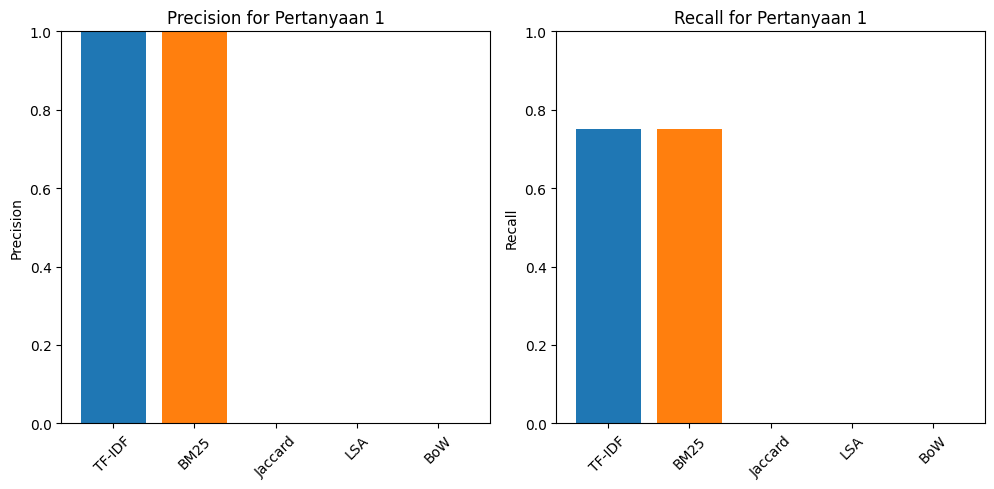

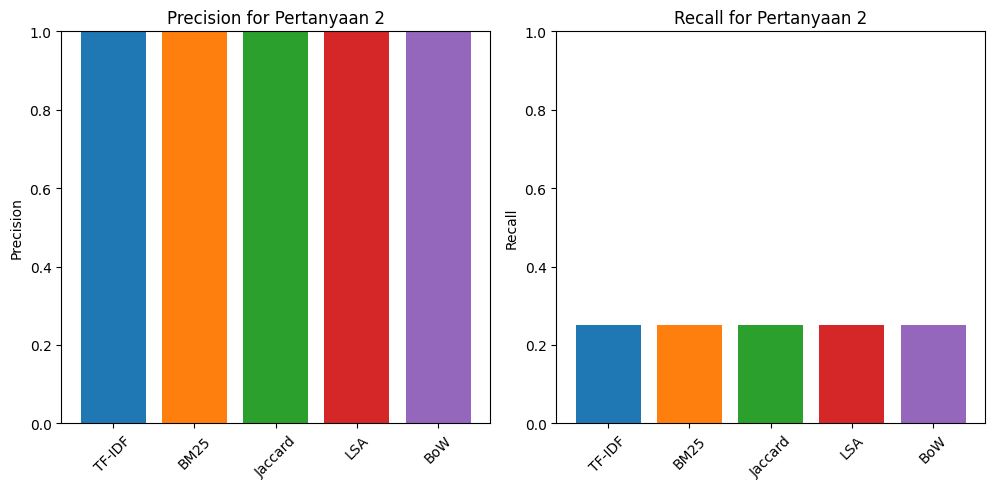

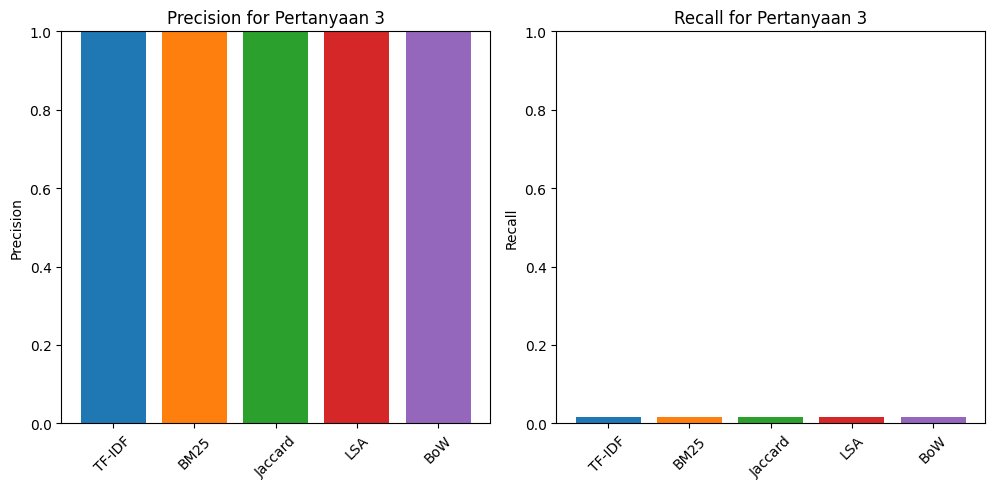

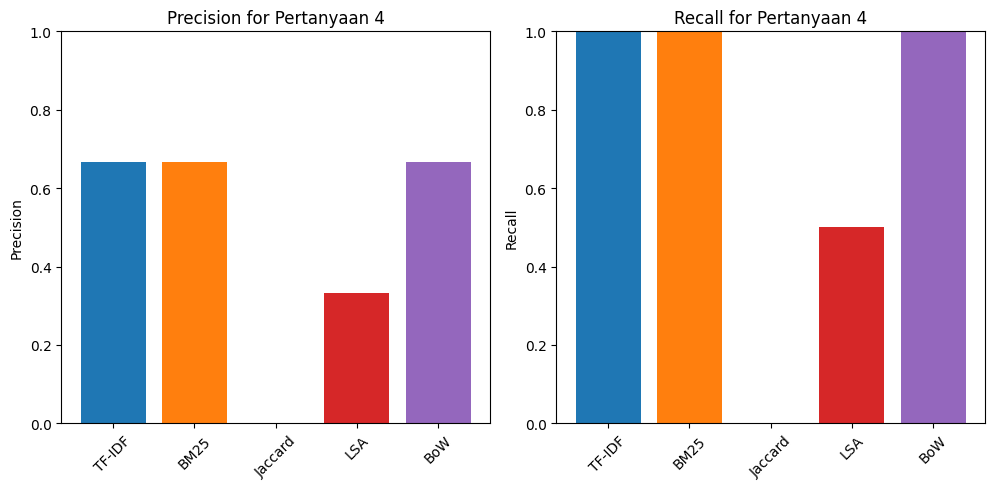

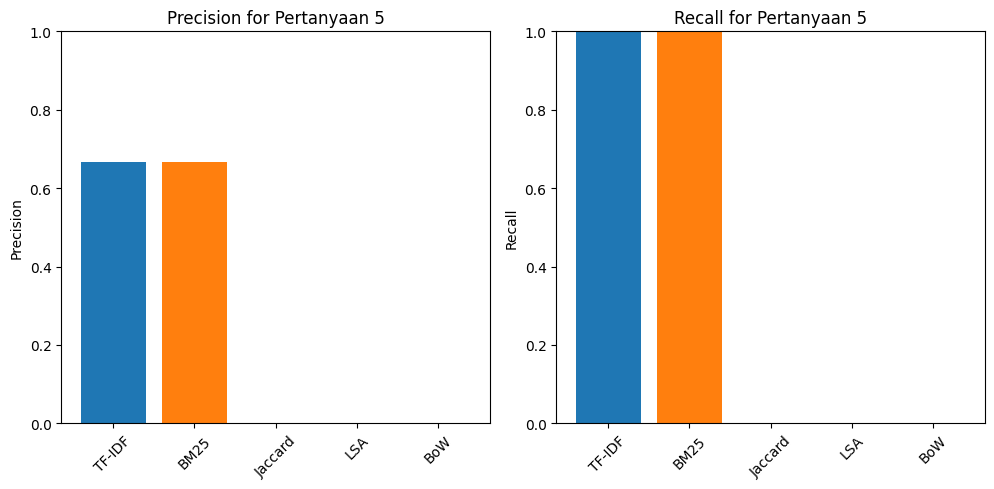

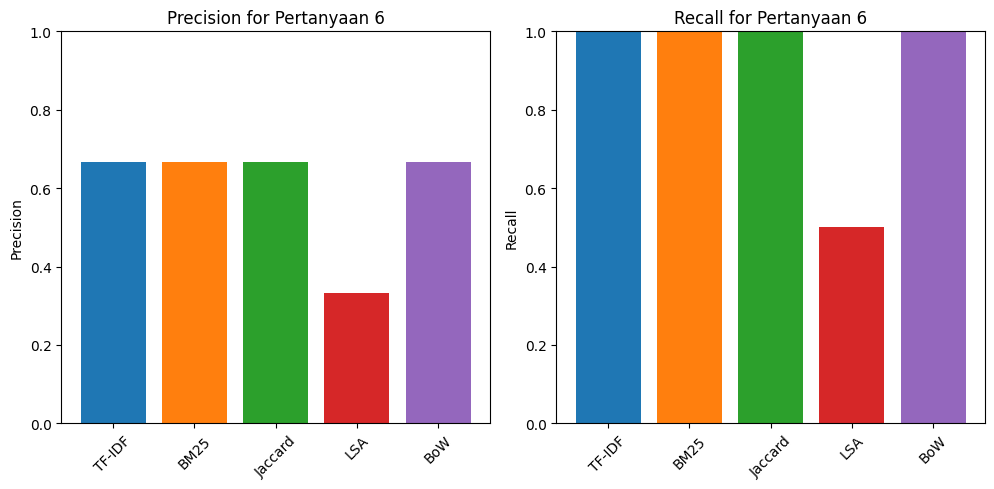

In [16]:
questions = metrics_df['Question'].unique()

for question in questions:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    subset = metrics_df[metrics_df['Question'] == question]
    for method in subset['Method'].unique():
        method_subset = subset[subset['Method'] == method]
        plt.bar(method_subset['Method'], method_subset['Precision'])  
    plt.title(f'Precision for {question}')
    plt.ylim(0, 1)
    plt.ylabel('Precision')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 2)
    for method in subset['Method'].unique():
        method_subset = subset[subset['Method'] == method]
        plt.bar(method_subset['Method'], method_subset['Recall'])  
    plt.title(f'Recall for {question}')
    plt.ylim(0, 1)
    plt.ylabel('Recall')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


1. pertanyaan 1:
   - metode *TF-IDF* dan *BM25* mencapai *Precision* sempurna (1.0) dengan *Recall* 0.75. Ini menunjukkan bahwa kedua metode ini berhasil mendeteksi semua jawaban yang benar, meskipun ada beberapa jawaban yang mungkin tidak relevan.
   - Metode lain seperti *Jaccard*, *LSA*, dan *BoW* mendapatkan skor 0, yang berarti tidak mampu menemukan jawaban yang sesuai.

2. pertanyaan 2:
   - semua metode mendapatkan *Precision* sempurna (1.0), tetapi dengan *Recall* rendah (0.25). Artinya, mereka berhasil mendeteksi beberapa jawaban yang benar namun kehilangan banyak jawaban yang relevan.

3. pertanyaan 3:
   - semua metode menunjukkan hasil *Recall* sangat rendah (0.017). Hal ini menunjukkan kurangnya kemampuan untuk menemukan banyak jawaban yang benar dalam dokumen yang relevan. Namun, *Precision* yang tinggi menunjukkan bahwa beberapa dokumen yang ditemukan relevan tetapi dalam jumlah yang sangat terbatas.

4. pertanyaan 4:
   - *TF-IDF*, *BM25*, dan *BoW* berhasil mencetak skor *Precision* tinggi, yang berarti mereka menemukan jawaban dengan tepat, tetapi hanya sebagian dari keseluruhan jawaban relevan yang ditemukan (*Recall* = 1.0).
   - *LSA* menunjukkan skor moderat dengan *Precision* dan *Recall* masing-masing 0.33 dan 0.5.

5. pertanyaan 5:
   - *TF-IDF* dan *BM25* sekali lagi menunjukkan kinerja baik dengan skor tinggi, sementara metode lain memiliki skor rendah, menunjukkan ketidakmampuan untuk menangkap relevansi dalam konteks ini.

6. pertanyaan 6:
   - hasil *Precision* dan *Recall* tinggi pada *TF-IDF*, *BM25*, *Jaccard*, dan *BoW* menunjukkan bahwa keempat metode ini efektif untuk Pertanyaan 6.
   - *LSA* menunjukkan skor lebih rendah, mungkin karena kurang tepatnya model dalam mengenali konteks jawaban.

secara keseluruhan, metode *TF-IDF* dan *BM25* umumnya lebih konsisten dan efektif dalam menemukan jawaban yang relevan di sebagian besar pertanyaan, dengan skor *Precision* dan *Recall* yang lebih tinggi dibandingkan metode lainnya.

### average metrics

In [17]:
average_metrics = metrics_df.groupby('Method').agg({'Precision': 'mean', 'Recall': 'mean'}).reset_index()


print(average_metrics)


    Method  Precision    Recall
0     BM25   0.833333  0.669540
1      BoW   0.555556  0.377874
2  Jaccard   0.444444  0.211207
3      LSA   0.444444  0.211207
4   TF-IDF   0.833333  0.669540


analisis dari hasil rata-rata *Precision* dan *Recall* untuk setiap metode adalah sebagai berikut:

1. BM25:
   - Mencapai skor *Precision* tertinggi (0.83) dan *Recall* (0.67) dibandingkan metode lain. Ini menunjukkan bahwa BM25 paling andal dalam mengidentifikasi jawaban yang relevan secara tepat (tinggi *Precision*) sekaligus mampu menemukan sebagian besar jawaban yang relevan dalam data (tinggi *Recall*). Secara keseluruhan, ini menjadikan BM25 sebagai metode yang paling efektif dalam konteks ini.

2. TF-IDF:
   - Memiliki skor *Precision* dan *Recall* yang sama tinggi dengan BM25 (0.83 dan 0.67), menunjukkan performa yang sangat mirip. TF-IDF berhasil menemukan jawaban yang relevan dengan tepat dan juga mencakup sebagian besar jawaban yang relevan, membuatnya cocok untuk digunakan dalam sistem pencarian ini.

3. BoW (Bag of Words):
   - Memiliki skor *Precision* (0.56) dan *Recall* (0.38) yang lebih rendah dibandingkan BM25 dan TF-IDF, yang berarti metode ini lebih sering mengidentifikasi dokumen yang kurang relevan dan cenderung melewatkan beberapa jawaban yang relevan. BoW mungkin memberikan hasil yang kurang akurat dalam situasi ini.

4. Jaccard dan LSA:
   - Kedua metode ini memiliki skor yang sama untuk *Precision* dan *Recall* (0.44 dan 0.21), yang relatif rendah dibandingkan dengan metode lain. Skor yang rendah menunjukkan bahwa baik Jaccard maupun LSA kurang efektif dalam menemukan dan mencakup jawaban yang relevan dalam konteks pertanyaan ini, mungkin karena kurangnya kemampuan mereka dalam menangkap relevansi secara semantik atau tekstual yang kompleks.

**Kesimpulan**
BM25 dan TF-IDF adalah metode yang paling efektif, dengan skor tertinggi dalam *Precision* dan *Recall*, sehingga keduanya sangat direkomendasikan untuk digunakan dalam sistem pencarian ini. BoW menunjukkan performa yang sedang, sementara Jaccard dan LSA kurang efektif dalam mencocokkan jawaban yang relevan.